<a href="https://colab.research.google.com/github/Akshcodecraft/ImageRecognitionML/blob/main/Image_Recognition_BootCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshayaramasamy","key":"df7a20ccd7961e8d7d2940f777bc360a"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


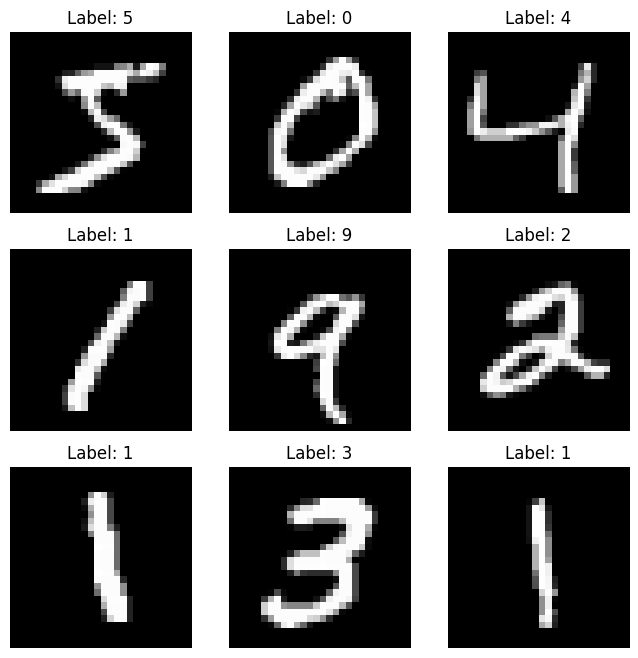

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [9]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9011 - loss: 0.3268 - val_accuracy: 0.9862 - val_loss: 0.0516
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9853 - loss: 0.0481 - val_accuracy: 0.9874 - val_loss: 0.0433
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.9890 - val_loss: 0.0372
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9933 - loss: 0.0195 - val_accuracy: 0.9877 - val_loss: 0.0435
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9883 - val_loss: 0.0460


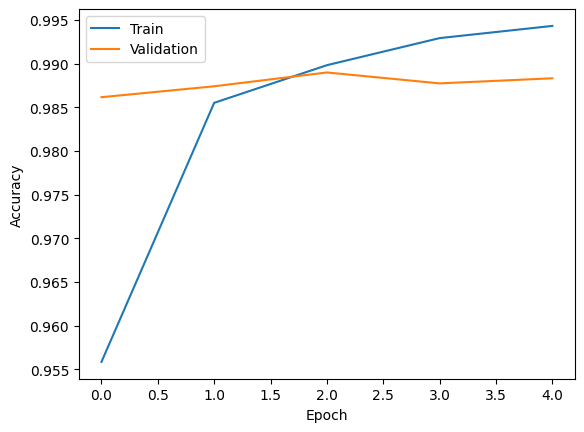

In [12]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9878 - loss: 0.0431
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [14]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,y_test_c10))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 83ms/step - accuracy: 0.3436 - loss: 1.7956 - val_accuracy: 0.4819 - val_loss: 1.5049
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.5254 - loss: 1.3300 - val_accuracy: 0.5697 - val_loss: 1.2362
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 82ms/step - accuracy: 0.5842 - loss: 1.1865 - val_accuracy: 0.4914 - val_loss: 1.6288
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.6158 - loss: 1.1015 - val_accuracy: 0.6079 - val_loss: 1.1548
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.6348 - loss: 1.0456 - val_accuracy: 0.6299 - val_loss: 1.1156
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.6457 - loss: 1.0259 - val_accuracy: 0.6622 - val_loss: 0.9756
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 80ms/step - accuracy: 0.6582 - loss: 0.9887 - val_accuracy: 0.6931 - val_loss: 0.8945
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1000
           1       0.90      0.77      0.83      1000
           2       0.71      0.55      0.62      1000
           3       0.65      0.41      0.50      1000
           4       0.70      0.61      0.65      1000
           5       0.66      0.58      0.62      1000
           6       0.76      0.82      0.79      1000
           7       0.63      0.82      0.71      1000
           8       0.81      0.83      0.82      1000
           9       0.58      0.94      0.72      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000



<function matplotlib.pyplot.show(close=None, block=None)>

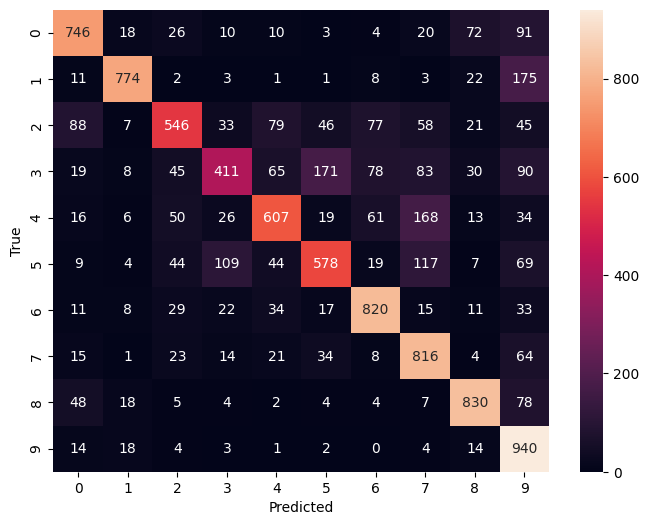

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [18]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 91% 198M/218M [00:00<00:00, 372MB/s]  
100% 218M/218M [00:00<00:00, 363MB/s]


In [19]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.7871 - loss: 0.5375 - val_accuracy: 0.7985 - val_loss: 0.5166
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - accuracy: 0.8002 - loss: 0.4940 - val_accuracy: 0.7985 - val_loss: 0.5135
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.8044 - loss: 0.4793 - val_accuracy: 0.7980 - val_loss: 0.5175
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.7966 - loss: 0.4663 - val_accuracy: 0.7985 - val_loss: 0.5233
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.8038 - loss: 0.4503 - val_accuracy: 0.7985 - val_loss: 0.5264


In [24]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1968s 8s/step - accuracy: 0.8020 - loss: 0.4668 - val_accuracy: 0.7985 - val_loss: 0.5282
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1979s 8s/step - accuracy: 0.7995 - loss: 0.4471 - val_accuracy: 0.7985 - val_loss: 0.5360
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1917s 8s/step - accuracy: 0.8091 - loss: 0.4095 - val_accuracy: 0.7975 - val_loss: 0.5368
